In [2]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from fgsm.deep_convnet import DeepConvNet
%matplotlib inline

from common.functions import softmax

Using TensorFlow backend.


In [3]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# # 1次元へ整形
# x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

##  4次元へ整形
x_train_shape = x_train.shape
x_train = x_train.reshape(x_train_shape[0], 1, x_train_shape[1], x_train_shape[2])

x_test_shape = x_test.shape
x_test = x_test.reshape(x_test_shape[0], 1, x_test_shape[1], x_test_shape[2])


# 正規化
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

In [4]:
import keras
from keras.models import model_from_json
from keras.utils import np_utils
from keras.optimizers import RMSprop

In [5]:
num_classes = 10

X_train = x_train.reshape(60000, 784)
X_test  = x_test.reshape(10000, 784)

y_train = keras.utils.to_categorical(t_train, num_classes)
y_test = keras.utils.to_categorical(t_test, num_classes)

In [6]:
# モデルを読み込む
model = model_from_json(open('../keras_sample/mnist_mlp_model.json').read())

# 学習結果を読み込む
model.load_weights('../keras_sample/mnist_mlp_weights.h5')

model.summary();

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

W1126 13:37:03.297451 140736894542784 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1126 13:37:03.316697 140736894542784 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1126 13:37:03.335005 140736894542784 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1126 13:37:03.335930 140736894542784 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placehol

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss :', score[0])
print('モデルBの正答率：', score[1])

モデルBの正答率： 0.9842


In [8]:
model_pred = model.predict(X_train)

In [9]:
model_pred.shape

(60000, 10)

In [14]:
y_train.shape

(60000, 10)

In [11]:
network = DeepConvNet()

In [12]:
from common.trainer import Trainer

In [16]:
max_epochs = 5
trainer = Trainer(network, x_train, model_pred, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.320470326088453
=== epoch:1, train acc:0.096, test acc:0.091 ===
train loss:2.2819979088427007
train loss:2.255390165101905
train loss:2.3106572900275437
train loss:2.2527619181452296
train loss:2.281321633649598
train loss:2.2768527733585007
train loss:2.2889505932883814
train loss:2.2654666500590563
train loss:2.2806492951772186
train loss:2.2679907618468755
train loss:2.2255559989914975
train loss:2.234859120326865
train loss:2.2596639431253775
train loss:2.2240487436720806
train loss:2.211743116899381
train loss:2.188780532247126
train loss:2.1535424956519975
train loss:2.162045995079754
train loss:2.1305191718197007
train loss:2.136933256624773
train loss:2.044128757882742
train loss:2.137101849676413
train loss:2.026687739721172
train loss:2.0877092246941023
train loss:1.9427944562557582
train loss:1.9335513798865405
train loss:2.0866833467540076
train loss:1.9291867577060264
train loss:2.001007351378713
train loss:2.111322714078462
train loss:2.022653917524261
train

train loss:0.9906449881387657
train loss:0.9678127482896849
train loss:1.175878645673404
train loss:1.3146171879084492
train loss:1.179348528754526
train loss:1.1490441931878168
train loss:1.2011006277053111
train loss:1.2524028383489116
train loss:1.0451757142130786
train loss:1.3376623090451012
train loss:1.2289433077544414
train loss:1.139675968594685
train loss:1.0309092701908509
train loss:1.1997126118607349
train loss:1.2396478777580056
train loss:1.122958957140247
train loss:1.17114410230904
train loss:0.9443772638172143
train loss:1.049659674892791
train loss:1.1788276826989117
train loss:1.1175220704993751
train loss:1.1523119494274177
train loss:1.3013322067884914
train loss:1.1677476835724396
train loss:1.0685461940501622
train loss:1.0419292056426883
train loss:1.0646085914276653
train loss:1.101386449753477
train loss:1.137747880041971
train loss:0.8894974427103927
train loss:1.0939826939932435
train loss:1.1518849206050685
train loss:1.0901908946814332
train loss:1.079942

train loss:1.057042482919014
train loss:0.9489608516911132
train loss:1.0760455461919738
train loss:0.9569494946625086
train loss:1.1629465819749794
train loss:1.178642138235727
train loss:1.0864043612782117
train loss:1.0441774260740413
train loss:0.885492733338958
train loss:0.9972761626072487
train loss:1.1358870375914107
train loss:1.2124777284786368
train loss:1.2124670443233203
train loss:1.1681995796290496
train loss:1.1265294183948757
train loss:0.945739721976789
train loss:1.0778046219548958
train loss:0.9895212480828737
train loss:1.016989142108291
train loss:1.0198693000003676
train loss:1.094574559657392
train loss:1.2906894227799213
train loss:0.9740927047926148
train loss:1.2446581354120398
train loss:0.9670692590601963
train loss:1.1943349134356862
train loss:1.0143981612995043
train loss:1.1864972634704518
train loss:0.9935498796785625
train loss:1.1019059020448767
train loss:1.0290295159656602
train loss:1.0245154332486062
train loss:0.8764126361551164
train loss:1.067

train loss:0.9266420132014845
train loss:1.2446066752562017
train loss:1.0779104047520878
train loss:1.1228427864979427
train loss:0.9628068846339453
train loss:1.0422385601715403
train loss:1.0706277865807985
train loss:0.9427304079746542
train loss:0.9590159417102727
train loss:0.8444174722602255
train loss:1.0743559535307388
train loss:1.0845489112507711
train loss:1.2425764867123823
train loss:1.1196169001737777
train loss:0.9302674026854855
train loss:1.1075119654637466
train loss:1.0079472526340512
train loss:0.8880489515890005
train loss:1.0130763754178214
train loss:0.9711460444898928
train loss:1.1014091562552246
train loss:0.8463846833547106
train loss:0.9323816940890681
train loss:0.890062744703161
train loss:0.9695793337698206
train loss:0.9296896203358296
train loss:0.9505499710805785
train loss:0.9568253644524419
train loss:1.037472872188452
train loss:1.1305643739287659
train loss:1.0953239092065044
train loss:0.863584857103493
train loss:0.8440251197444313
train loss:0.

train loss:1.0383092107230236
train loss:1.111724346725386
train loss:0.8784723457440932
train loss:1.1300108553505042
train loss:0.8238988271838832
train loss:0.8314948220661489
train loss:1.131232385351023
train loss:1.0752993993994417
train loss:0.8963341619692079
train loss:0.9655118346609
train loss:0.8131210597711624
train loss:0.8961791721061425
train loss:0.9055143648679866
train loss:0.9124955246917988
train loss:1.0662204442971868
train loss:1.1033814148256837
train loss:0.8828057440754159
train loss:0.789414179125439
train loss:0.9009422461308801
train loss:0.7728434585871092
train loss:0.776515325156716
train loss:0.8830872693516
train loss:0.9374835402329461
train loss:0.9448653749478101
train loss:0.9665900415577725
train loss:0.9458140547056835
train loss:0.9681632855656533
train loss:0.9803517468264737
train loss:0.8600362081067792
train loss:0.8768420836604837
train loss:0.6904719083339629
train loss:0.9536935246465329
train loss:1.1006070497547873
train loss:0.7346761

train loss:0.9725544648636607
train loss:0.927577935012832
train loss:1.0237054028501098
train loss:1.1039557818061474
train loss:1.1006188358367996
train loss:0.7547783416147085
train loss:0.9928367838684551
train loss:0.902784864406545
train loss:1.0183526547297452
train loss:0.7599673308610322
train loss:0.8836028689622336
train loss:1.0617669056268837
train loss:1.1026085233268426
train loss:1.038823578432346
train loss:1.1131088932613507
train loss:0.8215224051002454
train loss:0.9530953469210537
train loss:0.9997527998796155
train loss:1.1157362344572777
train loss:0.8210306231031246
train loss:1.0103741616833937
train loss:0.9206088113846694
train loss:0.9137667178919255
train loss:1.0665052943434
train loss:1.046583136885408
train loss:1.0060341591737874
train loss:1.1454897138147329
train loss:0.791531254942307
train loss:0.8497146903105361
train loss:1.1077046351158675
train loss:1.009335208123928
train loss:1.001157042376153
train loss:1.057527679123845
train loss:0.89736723

train loss:1.0169267884209552
train loss:0.9792234628078232
train loss:0.950340867241526
train loss:0.7622275694472269
train loss:0.8212246046458733
train loss:0.9191947124452412
train loss:1.082048621603294
train loss:0.9187306311642588
train loss:0.8272626717124978
train loss:1.0768104970240397
train loss:0.8774969291268697
train loss:0.8546868237201012
train loss:0.7050808343574505
train loss:0.8954436187488451
train loss:1.101271286755468
train loss:0.844577542640657
train loss:0.7282475230347936
train loss:1.0672992933656873
train loss:0.9622883243932258
train loss:0.9631617296260135
train loss:0.8607296386126339
train loss:0.919169291268221
train loss:0.8493283276334498
train loss:1.011273524158951
train loss:1.0039767856081976
train loss:1.1204075933873823
train loss:0.9545543659066769
train loss:0.9043248225912975
train loss:0.8527489274285032
train loss:0.8903009322995801
train loss:0.8897152678933787
train loss:1.086869067632208
train loss:0.7499073149543891
train loss:0.9164

train loss:0.8252079560943258
train loss:0.8812737689885916
train loss:1.155540187239651
train loss:0.8956152592675156
train loss:0.9824482554336292
train loss:1.019017245043101
train loss:0.864540722755336
train loss:0.9553108672392507
train loss:0.7816807418011354
train loss:0.7841009971123275
train loss:0.8895040007258035
train loss:0.9601403180716553
train loss:0.8173027497858284
train loss:0.9144759652186903
train loss:0.7685449802643373
train loss:0.93435054324644
train loss:0.9518312943971888
train loss:1.0177377599923718
train loss:0.8428647893782617
train loss:0.741471280280232
train loss:0.8863114582058604
train loss:0.8803945193388085
train loss:0.871822941630813
train loss:0.8186509923868478
train loss:0.8284294268819233
train loss:1.011329356575149
train loss:0.8771713225985538
train loss:0.9746504513669612
train loss:0.9499933090498645
train loss:1.0046355420146111
train loss:0.8998704934218148
train loss:0.9332108921651353
train loss:0.9198279211593433
train loss:0.91243

train loss:0.9283335847366986
train loss:0.9428654187236607
train loss:1.113065953794852
train loss:0.9026063061843874
train loss:0.9575222545378841
train loss:0.9494627876187838
train loss:0.8212181096593549
train loss:0.8936601648508166
train loss:0.9642506924649379
train loss:1.0462955596138857
train loss:1.0264248329516177
train loss:1.058079326910923
train loss:0.8683803615580239
train loss:0.8147745815361472
train loss:0.8868336832707999
train loss:0.8792044770123607
train loss:0.8513835918818263
train loss:0.8329970009790827
train loss:0.874831773426789
train loss:1.006537402951631
train loss:1.015913288959714
train loss:0.9681248994989632
train loss:0.847849379179246
train loss:1.032360312135615
train loss:0.8503975514139047
train loss:0.8816309311340993
train loss:0.9381538662011525
train loss:0.9527019450563858
train loss:0.9660066697706078
train loss:0.9771341837334281
train loss:1.0705620858188767
train loss:0.9394041158213479
train loss:1.0435916062497832
train loss:0.8987

train loss:0.9648638555290197
train loss:0.9220962488033809
train loss:0.9238457089816566
train loss:0.9350811729832667
train loss:0.900401349680224
train loss:0.776130877036304
train loss:0.9992804687531445
train loss:0.8098594372001994
train loss:0.8774701602137709
train loss:0.9854490162090639
train loss:0.9009691524269486
train loss:0.9986268836620797
train loss:0.7901232174416702
train loss:0.9058917624552093
train loss:1.0253534403696944
train loss:0.7782979815489118
train loss:0.8766931342433345
train loss:0.875055540448
train loss:0.8108806502389585
train loss:0.8741419164170549
train loss:1.0038907339317467
train loss:0.9222644925159588
train loss:1.1423189302055747
train loss:1.000209686622769
train loss:1.0450535818913622
train loss:0.9916083274719105
train loss:0.7175645447419984
train loss:1.000661450063398
train loss:0.9831476122291306
train loss:0.8291031821669061
train loss:0.7918079440312259
train loss:0.9495071652407026
train loss:0.8851680406841399
train loss:0.88539

train loss:0.8417143300661547
train loss:0.8243109885770566
train loss:0.9747986953029372
train loss:0.9593496000197033
train loss:1.0460298009033608
train loss:0.9871084995620921
train loss:0.823160778430935
train loss:0.933862636206361
train loss:1.0729473508958707
train loss:0.9527685229280856
train loss:0.7667979201215954
train loss:0.907513478448562
train loss:0.8688243934669337
train loss:0.8503197881433987
train loss:0.8760674232929024
train loss:0.9705593199764212
train loss:0.964419424889956
train loss:0.7812822362230708
train loss:0.820758802576152
train loss:0.7906362412449517
train loss:0.9186282250703931
train loss:1.0428066062480323
train loss:0.8236851564255886
train loss:0.8269818906611905
train loss:0.9310125200913197
train loss:0.9301578225772884
train loss:0.9777725680750504
train loss:0.9141652295655744
train loss:0.8900194463739801
train loss:0.8972144640721613
train loss:1.1240950781432195
train loss:0.979187218067365
train loss:1.1158854109309688
train loss:0.866

In [17]:
print("END")

END


In [18]:
test_acc = network.accuracy(x_test, t_test)
print("モデルAの正答率：", test_acc)

モデルAの正答率： 0.9907


In [19]:
# パラメータの保存
network.save_params("keras_clone_params.pkl")
print("Saved Network Parameters!")

Saved Network Parameters!


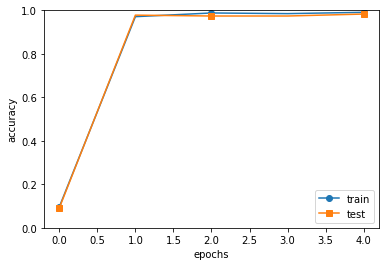

In [20]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
# plt.show()
plt.savefig('keras_clone_graph.png')